In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as st

In [2]:
df=pd.read_csv('I:\Text Datasets\CSV\drinks.csv')
tips=pd.read_csv(r'I:\Text Datasets\CSV\tips.csv')

In [3]:
df.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent,Years
0,Afghanistan,0,0,0,0.0,Asia,1827
1,Albania,89,132,54,4.9,Europe,1828
2,Algeria,25,0,14,0.7,Africa,1829
3,Andorra,245,138,312,12.4,Europe,1830
4,Angola,217,57,45,5.9,Africa,1831


#### Hypothesis Testing
 - Hypothesis mean giving a assumption about data which may be true or wrong that's why we use different test to check whether true or wrong called hypothessis testing
 
##### Types
- Null Hypothesis (H0)
- Alternative Hypothesis (H1)
 - Our basic assumption are known as H0 as Null Hypothesis & Other are called Alternative  there are different tests to check Whcih Hypothesis should accept Null or Alternative
 
#### Error Types
 - Type I Error
 - Type II Error
 
#### Type I
 - If Hypothesis should accept and we reject it that't come the Type I Error
 
#### Type II 
 - if Hypothesis should Reject and we accept it that's why Type II Error Popup
 
#### Test Types
- Z-Test
- T-Test
- Chi Square Test
- Annova Test

## Z-Test
- for z test std of population should be given and we have also take a alpha value by self and then find critical value from alpha as 
- 0.05 = 1.96 
- 0.04 = 1.88
- 0.06 = 2.08
- 0.01 = 2.58

- if z < alpha then Reject Null Hypothesis
- if z >= alpha then accept Null Hypthesis

In [40]:
H0=100.0
alpha=0.05
critical_value=1.96

In [41]:
pop_mean=df['beer_servings'].mean()

In [42]:
pop_std=df['beer_servings'].std()

In [43]:
sample=df['beer_servings'].sample(60)
st.ttest_1samp(sample,80.0)

Ttest_1sampResult(statistic=0.9756923016299888, pvalue=0.3332005853228268)

In [44]:
sample_mean=sample.mean()

In [45]:
z=(sample_mean-pop_mean)/(pop_std/np.sqrt(sample.shape[0]))

In [46]:
z
# So Z is less then alpha then reject it Null Hypothesis

-1.0066196885034826

## T-Test 
- when our data sample is less than s < 30 or standard deviation is not giving then we use the T-Test

#### Types
- One Sample Test
- Two Sample Test
  - Independent Test
  - Paired Test

#### One Samle T-Test

In [13]:
comp=st.poisson.rvs(loc=18,mu=35,size=1500)
samp=st.poisson.rvs(loc=18,mu=30,size=60)


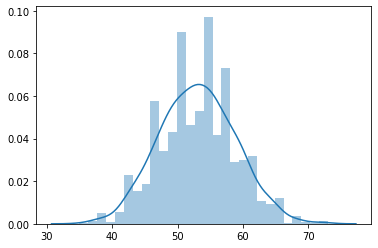

In [14]:
sns.distplot(comp)

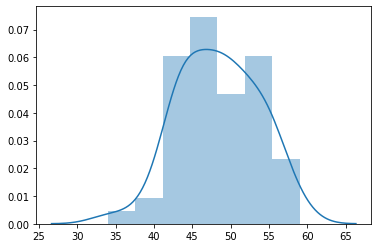

In [15]:
sns.distplot(samp)

In [16]:
comp.mean()

53.04666666666667

In [17]:
samp.mean()

48.36666666666667

In [18]:
st.ttest_1samp(samp,comp.mean())

Ttest_1sampResult(statistic=-6.914025618761841, pvalue=3.781585054212653e-09)

#### Two Sample Test as Independent

In [21]:
islamabad=st.poisson.rvs(loc=15,mu=40,size=60)
lahore=st.poisson.rvs(loc=18,mu=35,size=60)

In [22]:
st.ttest_ind(islamabad,lahore)

Ttest_indResult(statistic=2.0884373679250396, pvalue=0.0389088701314627)

#### Two Sample Test as Relevent or Paired

In [23]:
islamabad1=st.poisson.rvs(loc=15,mu=40,size=60)
islamabad2=st.poisson.rvs(loc=15,mu=35,size=60)

In [24]:
st.ttest_rel(islamabad1,islamabad2)

Ttest_relResult(statistic=3.0685461866917434, pvalue=0.0032468970622905723)

## Chi Square Test
- They are use to find the relationship between two catigorcal variables

In [4]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [32]:
# Hypothesis 
H0="There is a relationship between two featrues"
H1="There is a no relationship between two featrues"

In [71]:
# Alpha Values 0.05 as 95% confidence level
a=0.05
# Degree of Freedom (n-1)*(r-1)
df=1
# Critical Value from table with df
cv=3.841

In [37]:
observed_values=pd.crosstab(tips['sex'],tips['smoker'])
observed_values

smoker,No,Yes
sex,,
Female,54,33
Male,97,60


In [53]:
#Finding Exptected with With Statistics function
exp_value=st.chi2_contingency(observed_values)[3]

In [64]:
exp_value

array([[53.84016393, 33.15983607],
       [97.15983607, 59.84016393]])

In [72]:
chi2=st.chisquare(observed_values,exp_value)[0].sum()

In [78]:
if chi2>cv:
    print('Accept H1 Reject H0')
else:
    print('Accept H0 Reject H1')

Accept H0 Reject H1
